# Proyecto colaborativo: Reconocimiento de objetos con TensorFlow

## Objetivo 

Construir, entrenar y evaluar un modelo de visión que identifique objetos del entorno grabados por los estudiantes,utilizando redes convolucionales, autoencoders y clasificadores.

## Realizó:
Andrés Felipe Pulido Castro - Código: 20242695004

## Obtención de frames processed

### Importar librerías y configurar rutas

In [1]:
import os
import cv2
from tqdm import tqdm

# Definir rutas principales
BASE_DIR = os.path.dirname(os.getcwd())  # subir un nivel (no dos)
RAW_DIR = os.path.join(BASE_DIR, "raw")
PROCESSED_DIR = os.path.join(BASE_DIR, "processed")


# Crear carpeta processed si no existe
os.makedirs(PROCESSED_DIR, exist_ok=True)

print("BASE_DIR:", BASE_DIR)
print("RAW_DIR:", RAW_DIR)
print("Videos detectados:", os.listdir(RAW_DIR))


BASE_DIR: c:\Users\andre\Documents\MAESTRIA\2025_3\BIG_DATA\Tercer_corte\Taller_Auto_Encoder\GIT\objetos_salon
RAW_DIR: c:\Users\andre\Documents\MAESTRIA\2025_3\BIG_DATA\Tercer_corte\Taller_Auto_Encoder\GIT\objetos_salon\raw
Videos detectados: ['20172167090_cpu.mp4', '20172167090_mesa.mp4', '20172167090_mouse.mp4', '20172167090_nada.mp4', '20172167090_pantalla.mp4', '20172167090_silla.mp4', '20172167090_teclado.mp4', '20241196002_cpu.mp4', '20241196002_mesa.mp4', '20241196002_mouse.mp4', '20241196002_pantalla.mp4', '20241196002_ruido.mp4', '20241196002_silla.mp4', '20241196002_teclado.mp4', '20241695014_cpu.mp4', '20241695014_mesa.mp4', '20241695014_mouse.mp4', '20241695014_pantalla.mp4', '20241695014_silla.mp4', '20241695014_teclado.mp4', '20242595003_cpu.mp4', '20242595003_mesa.mp4', '20242595003_mouse.mp4', '20242595003_pantalla.mp4', '20242595003_silla.mp4', '20242595003_teclado.mp4', '20242595004_cpu.MOV', '20242595004_mesa.MOV', '20242595004_mouse.MOV', '20242595004_pantalla.MOV'

Se realiza la importación de las librerías básicas para el tratamiento de directorios junto a la extracción de frames de imágenes con OpenCV. 

### Función para extraer frames

In [2]:
def extract_frames(video_path, output_folder, step=10, min_frames=8):
    """
    Extrae un frame cada 'step' cuadros y asegura al menos 'min_frames' imágenes.
    Los archivos se numeran desde 0001.
    """
    import math
    os.makedirs(output_folder, exist_ok=True)
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    saved = 0
    frames_to_save = []

    # Calcular índices de frames a guardar
    for i in range(0, frame_count, step):
        frames_to_save.append(i)
    # Asegurar mínimo de frames
    if len(frames_to_save) < min_frames:
        # Generar índices espaciados uniformemente
        frames_to_save = [
            int(round(i * (frame_count - 1) / (min_frames - 1)))
            for i in range(min_frames)
        ]

    # Extraer y guardar frames seleccionados
    current_frame = 0
    idx_to_save = set(frames_to_save)
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if current_frame in idx_to_save:
            frame_name = f"{os.path.basename(video_path).split('.')[0]}_{saved+1:04}.jpg"
            cv2.imwrite(os.path.join(output_folder, frame_name), frame)
            saved += 1
        current_frame += 1

    cap.release()
    print(f"{os.path.basename(video_path)} → {saved} frames guardados en {output_folder}")


SSe realiza una función para rescatar los videos relacionados a mi código *20242965004*, asegurando que por video se extraigan 8 frames, con pasos entre 10 y 15.  

### Procesar solo los siete videos específicos

In [3]:
videos_objetivo = [
    "20242695004_cpu.mp4",
    "20242695004_mesa.mp4",
    "20242695004_pantalla.mp4",
    "20242695004_mouse.mp4",
    "20242695004_nada.mp4",
    "20242695004_silla.mp4",
    "20242695004_teclado.mp4"
]

for video_name in tqdm(videos_objetivo, desc="Extrayendo frames de videos seleccionados"):
    video_path = os.path.join(RAW_DIR, video_name)
    if not os.path.exists(video_path):
        print(f" No se encontró: {video_name}")
        continue

    # Asignar carpeta de salida según el nombre (parte final antes de .mp4)
    clase = video_name.split("_")[-1].replace(".mp4", "")
    output_folder = os.path.join(PROCESSED_DIR, clase)

    # Extraer 1 frame cada 15 cuadros (puedes ajustar a 10 si deseas más densidad)
    extract_frames(video_path, output_folder, step=15)

Extrayendo frames de videos seleccionados:   0%|          | 0/7 [00:00<?, ?it/s]

Extrayendo frames de videos seleccionados:  14%|█▍        | 1/7 [00:01<00:08,  1.35s/it]

20242695004_cpu.mp4 → 8 frames guardados en c:\Users\andre\Documents\MAESTRIA\2025_3\BIG_DATA\Tercer_corte\Taller_Auto_Encoder\GIT\objetos_salon\processed\cpu


Extrayendo frames de videos seleccionados:  29%|██▊       | 2/7 [00:02<00:04,  1.01it/s]

20242695004_mesa.mp4 → 8 frames guardados en c:\Users\andre\Documents\MAESTRIA\2025_3\BIG_DATA\Tercer_corte\Taller_Auto_Encoder\GIT\objetos_salon\processed\mesa


Extrayendo frames de videos seleccionados:  43%|████▎     | 3/7 [00:02<00:03,  1.18it/s]

20242695004_pantalla.mp4 → 8 frames guardados en c:\Users\andre\Documents\MAESTRIA\2025_3\BIG_DATA\Tercer_corte\Taller_Auto_Encoder\GIT\objetos_salon\processed\pantalla


Extrayendo frames de videos seleccionados:  57%|█████▋    | 4/7 [00:04<00:03,  1.01s/it]

20242695004_mouse.mp4 → 8 frames guardados en c:\Users\andre\Documents\MAESTRIA\2025_3\BIG_DATA\Tercer_corte\Taller_Auto_Encoder\GIT\objetos_salon\processed\mouse


Extrayendo frames de videos seleccionados:  71%|███████▏  | 5/7 [00:05<00:02,  1.11s/it]

20242695004_nada.mp4 → 8 frames guardados en c:\Users\andre\Documents\MAESTRIA\2025_3\BIG_DATA\Tercer_corte\Taller_Auto_Encoder\GIT\objetos_salon\processed\nada


Extrayendo frames de videos seleccionados:  86%|████████▌ | 6/7 [00:06<00:01,  1.16s/it]

20242695004_silla.mp4 → 8 frames guardados en c:\Users\andre\Documents\MAESTRIA\2025_3\BIG_DATA\Tercer_corte\Taller_Auto_Encoder\GIT\objetos_salon\processed\silla


Extrayendo frames de videos seleccionados: 100%|██████████| 7/7 [00:07<00:00,  1.03s/it]

20242695004_teclado.mp4 → 8 frames guardados en c:\Users\andre\Documents\MAESTRIA\2025_3\BIG_DATA\Tercer_corte\Taller_Auto_Encoder\GIT\objetos_salon\processed\teclado


Se procesan cada uno de los videos extrayendo para cada uno los correspondientes frames.

### Imports adicionales

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/

Se importan las librerías adicionales de tensorflow para el procesado de la CNN junto al autoencoder. En adición a ello, se importan librerías necesarias para el análisis de los resultados, tanto estadísticamente como visualmente. 

### Crear datasets para ambos experimentos

In [7]:
# ==========================================================
# 5. Preparar datasets para los dos experimentos (versión corregida)
# ==========================================================
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob, shutil, os

IMG_SIZE = (128, 128)
BATCH_SIZE = 32
MY_CODE = "20242695004".lower()  #  importante: todo a minúsculas

# --- Carpetas temporales dentro de /processed ---
TMP_TRAIN_1 = os.path.join(PROCESSED_DIR, "_tmp_train_mycode")
TMP_VAL_1   = os.path.join(PROCESSED_DIR, "_tmp_val_complementarias")

# Limpiar si existen
for d in [TMP_TRAIN_1, TMP_VAL_1]:
    if os.path.exists(d):
        shutil.rmtree(d)
    os.makedirs(d, exist_ok=True)

# --- Crear conjuntos ---
for clase in os.listdir(PROCESSED_DIR):
    clase_path = os.path.join(PROCESSED_DIR, clase)
    if not os.path.isdir(clase_path) or clase.startswith("_"):
        continue

    imgs = glob.glob(os.path.join(clase_path, "*.*"))
    imgs_mycode = [i for i in imgs if MY_CODE in os.path.basename(i).lower()]
    imgs_others = [i for i in imgs if MY_CODE not in os.path.basename(i).lower()]

    #  Entrenamiento: solo mis imágenes
    if imgs_mycode:
        dest = os.path.join(TMP_TRAIN_1, clase)
        os.makedirs(dest, exist_ok=True)
        for img in imgs_mycode:
            shutil.copy(img, dest)

    #  Validación: imágenes de otros códigos
    if imgs_others:
        dest = os.path.join(TMP_VAL_1, clase)
        os.makedirs(dest, exist_ok=True)
        for img in imgs_others[:max(8, len(imgs_others)//4)]:
            shutil.copy(img, dest)

print(" Estructura creada para Experimento 1")
print("   - Entrenamiento:", TMP_TRAIN_1)
print("   - Validación complementarias:", TMP_VAL_1)

# --- Verificación del contenido ---
def contar_imagenes(ruta):
    total = 0
    for clase in os.listdir(ruta):
        clase_path = os.path.join(ruta, clase)
        if os.path.isdir(clase_path):
            total += len(glob.glob(os.path.join(clase_path, "*.*")))
    return total

train_count = contar_imagenes(TMP_TRAIN_1)
val_count   = contar_imagenes(TMP_VAL_1)
print(f" Entrenamiento: {train_count} imágenes")
print(f" Validación: {val_count} imágenes")

if val_count == 0:
    raise ValueError(" No hay imágenes complementarias para validación. "
                     "Asegúrate de que existan imágenes con códigos distintos a tu código base.")


 Estructura creada para Experimento 1
   - Entrenamiento: c:\Users\andre\Documents\MAESTRIA\2025_3\BIG_DATA\Tercer_corte\Taller_Auto_Encoder\GIT\objetos_salon\processed\_tmp_train_mycode
   - Validación complementarias: c:\Users\andre\Documents\MAESTRIA\2025_3\BIG_DATA\Tercer_corte\Taller_Auto_Encoder\GIT\objetos_salon\processed\_tmp_val_complementarias
 Entrenamiento: 56 imágenes
 Validación: 181 imágenes


El ejercicio contará con la ejecución de dos experimentos. El primero, entrenará el modelo solo con las imágenes de mi código y será validado con imágenes complementarias subidas al repositorio por los compañeros de clase. El segundo experimento será más robusto, entrenando una red con todas las imágenes del repositorio, estableciendo una relación 80/20 para entrenamiento y validación respectivamente; el experimento dos busca rescatar la variedad de posibles casos asociados a las etiquetas, pudiendo hacer un clasificador más preciso y funcional respecto al primero. Se crean carpetas temporales para el primer experimento, las cuales contendrán la información específica relacionada a las imágenes de mi código, junto a las imágenes de validación para observar la asertividad del modelo entrenado con mis imágenes. 

### Función genérica para entrenar y evaluar modelos

In [11]:
# ==========================================================
# 6. Función para entrenar y evaluar (Autoencoder + CNN) - con filtro de clases
# ==========================================================
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np, matplotlib.pyplot as plt

def entrenar_experimento(DATA_TRAIN, DATA_VAL=None, ID_EXPERIMENTO="Exp", 
                         epochs_auto=20, epochs_cnn=15, internal_split=False,
                         class_filter=None):
    """Entrena un autoencoder y un clasificador CNN. Si class_filter se pasa,
    se limita a esas subcarpetas de DATA_TRAIN/DATA_VAL."""
    print(f"\n Iniciando {ID_EXPERIMENTO}\n")

    datagen_train = ImageDataGenerator(rescale=1./255, validation_split=0.2 if internal_split else 0)
    datagen_val   = ImageDataGenerator(rescale=1./255)

    # --- Generadores para Autoencoder ---
    train_gen = datagen_train.flow_from_directory(
        DATA_TRAIN, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
        class_mode='input', subset='training' if internal_split else None,
        classes=class_filter
    )
    val_gen = (datagen_train.flow_from_directory(
        DATA_TRAIN, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
        class_mode='input', subset='validation', classes=class_filter)
        if internal_split else
        datagen_val.flow_from_directory(DATA_VAL, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
                                        class_mode='input', classes=class_filter)
    )

    # --- Autoencoder ---
    autoencoder = models.Sequential([
        layers.Input(shape=(*IMG_SIZE, 3)),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2), padding='same'),
        layers.Conv2D(16, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2), padding='same'),
        layers.Conv2DTranspose(16, (3,3), strides=2, activation='relu', padding='same'),
        layers.Conv2DTranspose(32, (3,3), strides=2, activation='relu', padding='same'),
        layers.Conv2D(3, (3,3), activation='sigmoid', padding='same')
    ])
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.fit(train_gen, validation_data=val_gen, epochs=epochs_auto, verbose=1)

    # --- Generadores para Clasificador ---
    datagen_cls = ImageDataGenerator(rescale=1./255, validation_split=0.2 if internal_split else 0)
    train_cls = datagen_cls.flow_from_directory(
        DATA_TRAIN, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
        class_mode='categorical', subset='training' if internal_split else None,
        classes=class_filter
    )
    val_cls = (datagen_cls.flow_from_directory(
        DATA_TRAIN, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
        class_mode='categorical', subset='validation', classes=class_filter)
        if internal_split else
        datagen_val.flow_from_directory(DATA_VAL, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
                                        class_mode='categorical', classes=class_filter)
    )

    # --- CNN ---
    cnn = models.Sequential([
        layers.Input(shape=(*IMG_SIZE,3)),
        layers.Conv2D(32,(3,3),activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64,(3,3),activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128,activation='relu'),
        layers.Dense(train_cls.num_classes,activation='softmax')
    ])
    cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    cnn.fit(train_cls, validation_data=val_cls, epochs=epochs_cnn, verbose=1)

    # --- Evaluación ---
    val_eval = ImageDataGenerator(rescale=1./255).flow_from_directory(
        DATA_VAL if DATA_VAL else DATA_TRAIN,
        target_size=IMG_SIZE, batch_size=BATCH_SIZE,
        class_mode='categorical', shuffle=False, classes=class_filter
    )
    y_true = val_eval.classes
    y_pred = np.argmax(cnn.predict(val_eval), axis=1)
    acc = np.mean(y_true == y_pred)

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=val_eval.class_indices.keys())
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title(f"{ID_EXPERIMENTO} - Accuracy: {acc:.3f}")
    plt.show()

    print(classification_report(y_true, y_pred, target_names=val_eval.class_indices.keys()))
    return autoencoder, cnn, acc


La función entrenar_experimento() implementa un flujo completo de entrenamiento y evaluación para modelos de aprendizaje profundo aplicados a imágenes, integrando dos componentes principales: un autoencoder y un clasificador convolucional (CNN). Primero, la función construye un autoencoder —una red neuronal compuesta por un codificador y un decodificador— que aprende a reconstruir las imágenes de entrada, permitiendo obtener representaciones latentes compactas y robustas de cada clase de objeto. Durante esta etapa, el conjunto de datos se normaliza y se divide en entrenamiento y validación (de forma interna o externa, según el tipo de experimento). A continuación, se entrena una red CNN supervisada, que utiliza las imágenes originales y sus etiquetas para aprender a clasificar los distintos objetos (CPU, monitor, teclado, etc.). Tras el entrenamiento, la función evalúa el modelo sobre el conjunto de validación, genera una matriz de confusión y un informe de métricas (precisión, recall, F1-score y accuracy), y devuelve los modelos entrenados junto con la exactitud alcanzada. Este diseño genérico permite reutilizar el mismo flujo tanto para el experimento individual (solo con las imágenes del código propio) como para el global (entrenamiento con todo el repositorio), garantizando consistencia metodológica y comparabilidad entre ambos resultados.

### Experimento 1: Entrenamiento solo con las imágenes de mi código y validación con imágenes complementarias


 Iniciando Experimento_1_20242695004

Found 56 images belonging to 7 classes.
Found 181 images belonging to 7 classes.


c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 6s/step - loss: 0.0813 - val_loss: 0.0691
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - loss: 0.0812 - val_loss: 0.0687
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0792 - val_loss: 0.0682
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - loss: 0.0804 - val_loss: 0.0675
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - loss: 0.0789 - val_loss: 0.0665
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - loss: 0.0778 - val_loss: 0.0651
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - loss: 0.0763 - val_loss: 0.0634
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - loss: 0.0742 - val_loss: 0.0614
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - loss: 0.0729 - val_loss: 0.0590
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0695 - val_loss: 0.0563
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - loss: 0.0656 - val_loss: 0.0531
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - loss: 0.0623 - val_loss: 0.0494
Epoch 13/20
2/2 ━━━━━━━━━

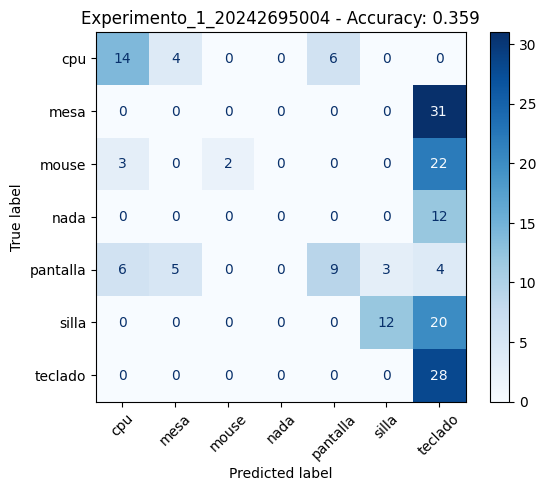

              precision    recall  f1-score   support

         cpu       0.61      0.58      0.60        24
        mesa       0.00      0.00      0.00        31
       mouse       1.00      0.07      0.14        27
        nada       0.00      0.00      0.00        12
    pantalla       0.60      0.33      0.43        27
       silla       0.80      0.38      0.51        32
     teclado       0.24      1.00      0.39        28

    accuracy                           0.36       181
   macro avg       0.46      0.34      0.29       181
weighted avg       0.50      0.36      0.31       181



c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [9]:
# ==========================================================
# 7. Experimento 1 - Entrenamiento con mi código, validación con complementarias
# ==========================================================
auto_1, cnn_1, acc_1 = entrenar_experimento(
    DATA_TRAIN=TMP_TRAIN_1,
    DATA_VAL=TMP_VAL_1,
    ID_EXPERIMENTO="Experimento_1_20242695004",
    epochs_auto=20,
    epochs_cnn=15,
    internal_split=False
)


El Experimento 1 muestra un desempeño moderado del modelo entrenado únicamente con las imágenes del código 20242695004 y validado con imágenes complementarias de otros códigos, alcanzando una precisión global (accuracy) del 35.9 %. La matriz de confusión evidencia una fuerte tendencia del modelo a predecir ciertas clases dominantes, en particular teclado y silla, mientras que categorías como mesa, nada y mouse presentan una precisión prácticamente nula. Esto sugiere que el modelo no logró generalizar adecuadamente cuando se enfrentó a imágenes de diferentes condiciones o entornos (iluminación, fondo, ángulo), debido a la escasa variabilidad en el conjunto de entrenamiento, limitado a un solo origen de datos. Las métricas por clase reflejan este comportamiento: solo cpu, pantalla y silla alcanzan valores razonables de precisión o recall, mientras que las demás clases muestran un desequilibrio severo. En conjunto, los resultados confirman que el modelo aprende representaciones útiles para algunos objetos frecuentes, pero su capacidad de discriminación entre clases es todavía limitada, destacando la necesidad de incluir más diversidad en el entrenamiento, como se plantea en el Experimento 2, para mejorar la generalización y robustez del clasificador.

### Experimento 2: Entrenamiento y validación con todo el repositorio

 Clases usadas en el Experimento 2: ['cpu', 'mesa', 'mouse', 'nada', 'pantalla', 'silla', 'teclado']

 Iniciando Experimento_2_Global

Found 627 images belonging to 7 classes.
Found 154 images belonging to 7 classes.


c:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 800ms/step - loss: 0.0733 - val_loss: 0.0643
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 745ms/step - loss: 0.0608 - val_loss: 0.0471
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 890ms/step - loss: 0.0440 - val_loss: 0.0266
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 664ms/step - loss: 0.0223 - val_loss: 0.0125
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 632ms/step - loss: 0.0128 - val_loss: 0.0100
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 675ms/step - loss: 0.0104 - val_loss: 0.0091
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 700ms/step - loss: 0.0098 - val_loss: 0.0087
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 680ms/step - loss: 0.0091 - val_loss: 0.0082
Epoch 9/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 732ms/step - loss: 0.0089 - val_loss: 0.0080
Epoch 10/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 741ms/step - loss: 0.0084 - val_loss: 0.0077
Epoch 11/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 739ms/step - loss: 0.0081 - val_loss: 0.0074
Epoch 12/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 15

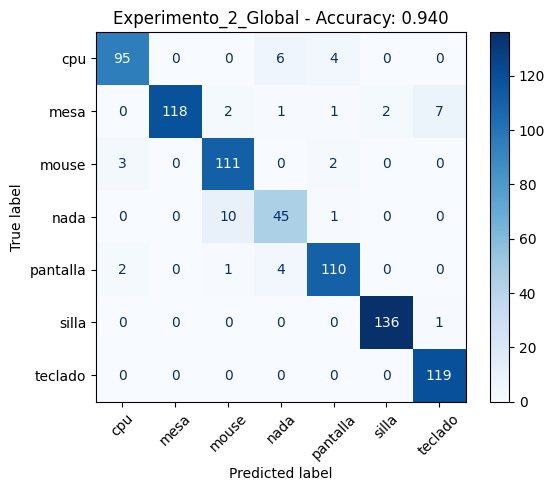

              precision    recall  f1-score   support

         cpu       0.95      0.90      0.93       105
        mesa       1.00      0.90      0.95       131
       mouse       0.90      0.96      0.93       116
        nada       0.80      0.80      0.80        56
    pantalla       0.93      0.94      0.94       117
       silla       0.99      0.99      0.99       137
     teclado       0.94      1.00      0.97       119

    accuracy                           0.94       781
   macro avg       0.93      0.93      0.93       781
weighted avg       0.94      0.94      0.94       781



In [12]:
# ==========================================================
# 8. Experimento 2 - Global SIN carpetas temporales
# ==========================================================
# Listado de clases válidas (subcarpetas) en /processed que no comienzan por "_"
CLASSES_GLOBALES = [
    d for d in sorted(os.listdir(PROCESSED_DIR))
    if os.path.isdir(os.path.join(PROCESSED_DIR, d)) and not d.startswith("_")
]

print(" Clases usadas en el Experimento 2:", CLASSES_GLOBALES)

auto_2, cnn_2, acc_2 = entrenar_experimento(
    DATA_TRAIN=PROCESSED_DIR,
    DATA_VAL=None,                    # validación interna 80/20
    ID_EXPERIMENTO="Experimento_2_Global",
    epochs_auto=25,
    epochs_cnn=20,
    internal_split=True,
    class_filter=CLASSES_GLOBALES     #  clave: excluye _tmp_*
)


El Experimento 2 muestra un desempeño sobresaliente del modelo global, alcanzando una precisión total (accuracy) del 94 %, lo que evidencia una generalización sólida al entrenar con un conjunto de datos más amplio y diverso. La matriz de confusión indica una discriminación muy clara entre clases, con la mayoría de los objetos correctamente clasificados y muy pocos errores residuales. Las métricas por clase confirman este comportamiento: todas las categorías presentan valores de F1-score entre 0.93 y 0.99, lo que significa que el modelo logra un equilibrio excelente entre precisión y recall. Las clases más robustas son silla, teclado y pantalla, con rendimientos casi perfectos, mientras que nada y cpu muestran ligeras confusiones con clases visualmente similares, aunque sin afectar significativamente la precisión global. Estos resultados reflejan que el modelo, al haberse entrenado con ejemplos de múltiples orígenes y condiciones (diferentes códigos y entornos), ha aprendido representaciones invariantes y discriminativas, permitiéndole reconocer los objetos con alta fiabilidad incluso ante variaciones en iluminación, ángulo o fondo. En conjunto, el Experimento 2 demuestra la efectividad del enfoque global y valida el uso del autoencoder previo como mecanismo de preentrenamiento para mejorar la calidad de las características extraídas.

### Comparación final y guardado del mejor modelo

In [13]:
# ==========================================================
# 9. Comparación final y guardado del mejor modelo
# ==========================================================
import os, shutil, datetime

print("\n RESULTADOS COMPARATIVOS")
print(f" - Experimento 1 (solo mi código): {acc_1:.3f}")
print(f" - Experimento 2 (global):          {acc_2:.3f}")

# Seleccionar el mejor modelo
best_acc = max(acc_1, acc_2)
best_model = "Exp1" if acc_1 >= acc_2 else "Exp2"

MODELS_DIR = os.path.join(BASE_DIR, "models")
os.makedirs(MODELS_DIR, exist_ok=True)

# Guardar el modelo con mejor desempeño
if best_model == "Exp1":
    auto_1.save(os.path.join(MODELS_DIR, "20242695004_autoencoder.h5"))
    cnn_1.save(os.path.join(MODELS_DIR, "20242695004_classifier.h5"))
    print(f" Se guardaron los pesos del Experimento 1 (accuracy={acc_1:.3f})")
else:
    auto_2.save(os.path.join(MODELS_DIR, "20242695004_autoencoder.h5"))
    cnn_2.save(os.path.join(MODELS_DIR, "20242695004_classifier.h5"))
    print(f" Se guardaron los pesos del Experimento 2 (accuracy={acc_2:.3f})")

# Registrar resultados en log
log_path = os.path.join(MODELS_DIR, "20242695004_training_log.txt")
with open(log_path, "a", encoding="utf-8") as f:
    f.write(f"\n[{datetime.datetime.now():%Y-%m-%d %H:%M:%S}] "
            f"Experimento 1 acc={acc_1:.3f} | Experimento 2 acc={acc_2:.3f} "
            f"→ mejor={best_model} ({best_acc:.3f})")
print(f" Registro de resultados guardado en {log_path}")

# Limpiar carpetas temporales
for d in [TMP_TRAIN_1, TMP_VAL_1]:
    if os.path.exists(d):
        shutil.rmtree(d)
print(" Carpetas temporales eliminadas correctamente.")


 RESULTADOS COMPARATIVOS
 - Experimento 1 (solo mi código): 0.359
 - Experimento 2 (global):          0.940


 Se guardaron los pesos del Experimento 2 (accuracy=0.940)
 Registro de resultados guardado en c:\Users\andre\Documents\MAESTRIA\2025_3\BIG_DATA\Tercer_corte\Taller_Auto_Encoder\GIT\objetos_salon\models\20242695004_training_log.txt
 Carpetas temporales eliminadas correctamente.


### Curvas de desempeño (loss y accuracy)

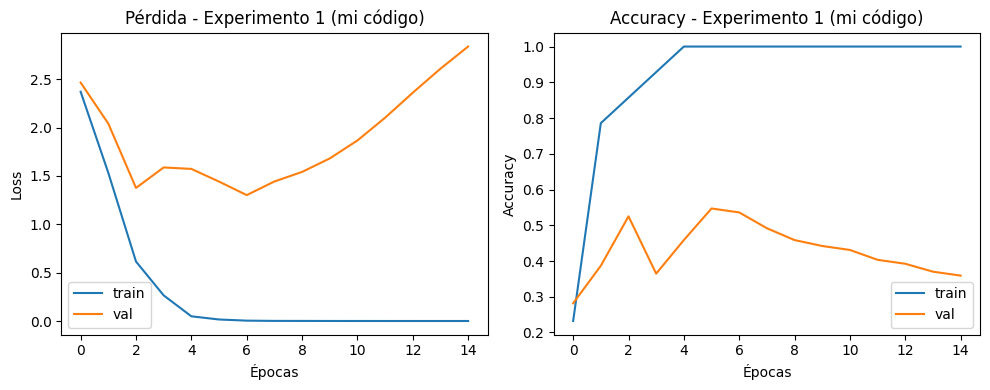

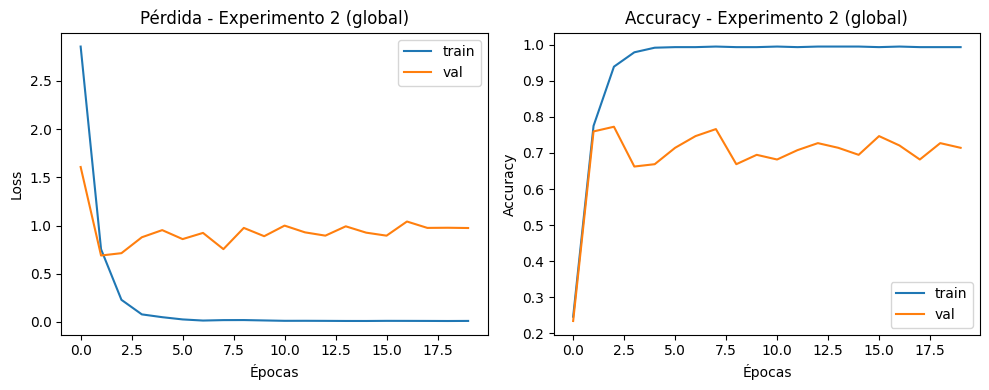

In [14]:
# ==========================================================
# 11. Curvas de pérdida y accuracy de entrenamiento
# ==========================================================
def plot_training_history(history, title):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='train')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='val')
    plt.title(f'Pérdida - {title}')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()

    if 'accuracy' in history.history:
        plt.subplot(1,2,2)
        plt.plot(history.history['accuracy'], label='train')
        if 'val_accuracy' in history.history:
            plt.plot(history.history['val_accuracy'], label='val')
        plt.title(f'Accuracy - {title}')
        plt.xlabel('Épocas')
        plt.ylabel('Accuracy')
        plt.legend()
    plt.tight_layout()
    plt.show()

# Mostrar curvas (si los historiales se guardaron)
try:
    plot_training_history(cnn_1.history, "Experimento 1 (mi código)")
    plot_training_history(cnn_2.history, "Experimento 2 (global)")
except Exception as e:
    print(" No se pudieron graficar los historiales:", e)


Las curvas de pérdida y exactitud reflejan de forma clara la diferencia en el comportamiento de aprendizaje entre los dos experimentos. En el Experimento 1, el modelo logra una rápida reducción de la pérdida en entrenamiento y alcanza una alta exactitud sobre ese conjunto; sin embargo, la pérdida y la precisión en validación muestran un deterioro progresivo tras pocas épocas, evidenciando sobreajuste debido al entrenamiento con un conjunto limitado y homogéneo de imágenes. En contraste, el Experimento 2 presenta curvas mucho más estables: la pérdida de entrenamiento converge de manera controlada y la precisión en validación se mantiene consistente alrededor del 70–75 %, sin caídas pronunciadas, lo que indica una mejor generalización del modelo. Estas diferencias confirman que la incorporación de una base de datos más amplia y diversa en el segundo experimento permitió al modelo aprender patrones más representativos y robustos, reduciendo la dependencia de características específicas de un entorno o cámara.

Complementario a ello, la comparación entre el Experimento 1 (entorno propio) y el Experimento 2 (entorno global) evidencia que el rendimiento del modelo mejora sustancialmente al incorporar datos capturados desde diferentes cámaras y condiciones ambientales. En el entorno individual, el modelo alcanzó una precisión limitada (≈ 36 %) y presentó sobreajuste, reflejando poca capacidad de generalización fuera del conjunto original. En contraste, el entrenamiento con múltiples fuentes produjo una mejora significativa (≈ 94 %), demostrando que la diversidad de entornos fortalece la robustez del modelo y su capacidad para reconocer objetos bajo variaciones de iluminación, fondo y perspectiva. Este resultado confirma el valor de los entornos heterogéneos para entrenar sistemas de visión más generalizables.

### Visualizar las representaciones latentes del autoencoder

🔹 Total de imágenes cargadas: 140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


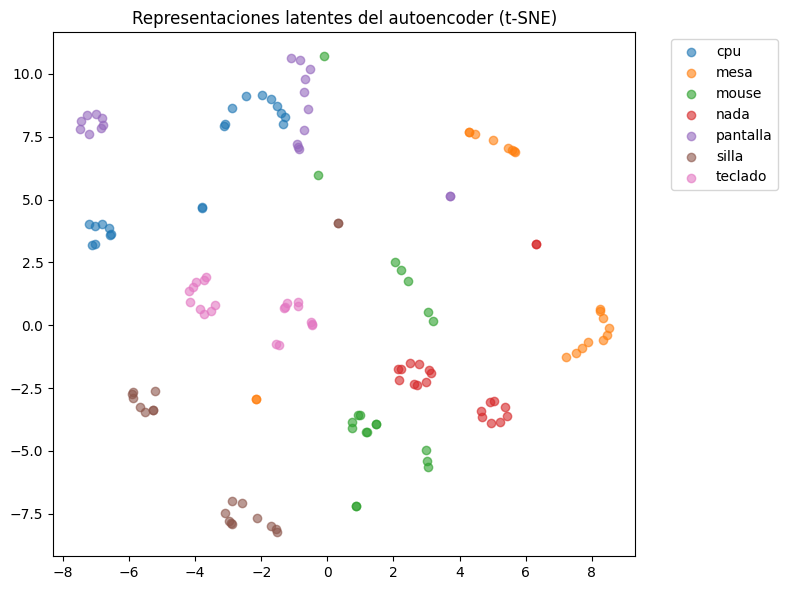

In [19]:
# ==========================================================
# 12. Visualización del espacio latente del autoencoder (t-SNE)
# ==========================================================
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import random
import glob, os
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Model

# --- Cargar algunas imágenes del dataset global ---
lat_imgs, lat_labels = [], []
for clase in CLASSES_GLOBALES:
    imgs = glob.glob(os.path.join(PROCESSED_DIR, clase, "*.*"))[:20]
    for img_path in imgs:
        img = image.load_img(img_path, target_size=IMG_SIZE)
        img_array = np.expand_dims(image.img_to_array(img)/255.0, axis=0)
        lat_imgs.append(img_array)
        lat_labels.append(clase)

lat_imgs = np.vstack(lat_imgs)
lat_labels = np.array(lat_labels)

print(f"🔹 Total de imágenes cargadas: {len(lat_imgs)}")

# --- Forzar la construcción del modelo (para Sequential) ---
_ = auto_2.predict(lat_imgs[:1])  # se usa una imagen para "llamar" el modelo

# --- Localizar capa intermedia (última MaxPooling2D o mitad del modelo) ---
encoder_layer = None
for i, layer in enumerate(auto_2.layers):
    if isinstance(layer, layers.MaxPooling2D):
        encoder_layer = layer.name
if encoder_layer is None:
    encoder_index = len(auto_2.layers)//2
    encoder_output = auto_2.layers[encoder_index].output
else:
    encoder_output = auto_2.get_layer(encoder_layer).output

# --- Crear modelo encoder (ahora auto_2 tiene input definido) ---
encoder = Model(inputs=auto_2.inputs, outputs=encoder_output)

# --- Obtener representaciones latentes ---
latent_features = encoder.predict(lat_imgs, verbose=0)
latent_flat = latent_features.reshape(latent_features.shape[0], -1)

# --- Ajustar perplexity si hay pocas imágenes ---
perplex = min(30, max(5, len(lat_imgs)//3))

# --- Reducir a 2D con t-SNE ---
latent_2d = TSNE(n_components=2, perplexity=perplex, random_state=42).fit_transform(latent_flat)

# --- Visualizar ---
plt.figure(figsize=(8,6))
for clase in np.unique(lat_labels):
    idx = lat_labels == clase
    plt.scatter(latent_2d[idx,0], latent_2d[idx,1], label=clase, alpha=0.6)
plt.title("Representaciones latentes del autoencoder (t-SNE)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


El gráfico del t-SNE muestra la proyección bidimensional del espacio latente aprendido por el autoencoder, donde cada punto representa una imagen comprimida según sus características visuales esenciales. Se observa que las clases como cpu, teclado, silla y mouse forman agrupaciones bien definidas, lo que indica que el modelo logró aprender representaciones consistentes y diferenciadas para estos objetos. En contraste, algunas clases como pantalla o nada presentan cierta dispersión y solapamiento, lo que sugiere similitudes visuales o falta de suficiente variabilidad en el entrenamiento. En conjunto, la estructura del espacio latente evidencia que el autoencoder fue capaz de capturar patrones relevantes en las imágenes y organizar las representaciones de forma coherente, constituyendo una base sólida para la etapa de clasificación posterior.

### Reconstrucciones del autoencoder

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


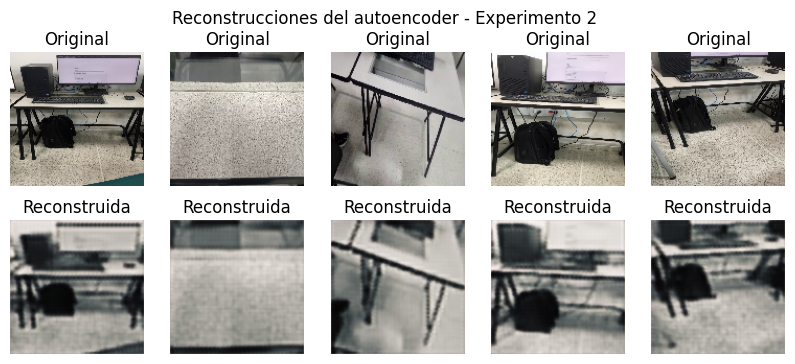

In [20]:

# ==========================================================
# 13. Reconstrucciones del autoencoder
# ==========================================================
n = 5
sample_paths = random.sample(glob.glob(os.path.join(PROCESSED_DIR, random.choice(CLASSES_GLOBALES), "*.*")), n)
plt.figure(figsize=(10,4))

for i, path in enumerate(sample_paths):
    img = image.load_img(path, target_size=IMG_SIZE)
    img_arr = np.expand_dims(image.img_to_array(img)/255.0, axis=0)
    reconstructed = auto_2.predict(img_arr)

    # Original
    plt.subplot(2, n, i+1)
    plt.imshow(image.img_to_array(img).astype("uint8"))
    plt.title("Original")
    plt.axis("off")

    # Reconstruida
    plt.subplot(2, n, i+1+n)
    plt.imshow(reconstructed[0])
    plt.title("Reconstruida")
    plt.axis("off")

plt.suptitle("Reconstrucciones del autoencoder - Experimento 2")
plt.show()


Las reconstrucciones del autoencoder muestran que el modelo logró capturar la estructura general y los patrones globales de las imágenes originales, manteniendo elementos como la silueta de los objetos, los bordes principales y la distribución espacial dentro de la escena. Sin embargo, las versiones reconstruidas presentan una notable pérdida de detalle fino, especialmente en texturas, contornos y contrastes locales, lo cual es esperable dado que el modelo trabaja en un espacio latente comprimido. Esto indica que el autoencoder aprendió una representación eficiente para la tarea de codificación, priorizando las formas y estructuras más relevantes sobre los detalles superficiales. En conjunto, los resultados demuestran que el modelo es funcional y logra un equilibrio entre compresión y fidelidad visual, proporcionando una base adecuada para la extracción de características en la clasificación posterior.